# Sentiment analysis with Logistic Regression

### Some plotting functions

In [1]:
# Importing packages
from matplotlib import pyplot as plt
import numpy as np
import random

In [2]:
# Some functions to plot our points and draw the lines
def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in spam],
                [s[0][1] for s in spam],
                s = 200,
                color = 'cyan',
                edgecolor = 'k',
                marker = '^')
    plt.scatter([s[0][0] for s in ham],
                [s[0][1] for s in ham],
                s = 200,
                color = 'red',
                edgecolor = 'k',
                marker = 's')
    plt.xlabel('aack')
    plt.ylabel('beep')
    plt.legend(['happy','sad'])
def draw_line(a,b,c, color='black', linewidth=2.0, linestyle='solid', starting=0, ending=3):
    # Plotting the line ax + by + c = 0
    x = np.linspace(starting, ending, 1000)
    plt.plot(x, -c/b - a*x/b, linestyle=linestyle, color=color, linewidth=linewidth)

In [3]:
import numpy as np
X = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[3,2],[2,3]])
y = np.array([0,0,0,0,1,1,1,1])

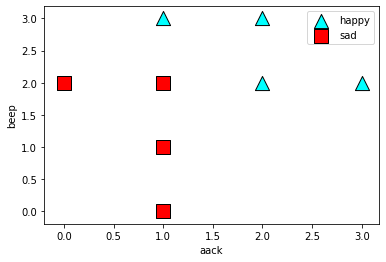

In [4]:
# Plotting the points
plot_points(X, y)

# Uncomment the following line to see a good line fit for this data.
#draw_line(1,1,-3.5)

### Logistic regression

In [12]:
def sigmoid(x):
    return np.exp(x)/(1+np.exp(x))

def score(weights, bias, features):
    return np.dot(weights, features) + bias

def prediction(weights, bias, features):
    return sigmoid(score(weights, bias, features))

def log_loss(weights, bias, features, label):
    pred = 1.0*prediction(weights, bias, features)
    return -label*np.log(pred) - (1-label)*np.log(1-pred)

def total_log_loss(weights, bias, X, y):
    total_error = 0
    for i in range(len(X)):
        total_error += log_loss(weights, bias, X[i], y[i])
    return total_error

In [17]:
# Alternate way of writing log-loss

def soft_relu(x):
    return np.log(1+np.exp(x))

def alternate_log_loss(weights, bias, features, label):
    pred = prediction(weights, bias, features)
    return soft_relu((pred-label)*score(weights, bias, features))

def total_alternate_log_loss(weights, bias, X, y):
    total_error = 0
    for i in range(len(X)):
        total_error += log_loss(weights, bias, X[i], y[i])
    return total_error

In [18]:
def logistic_trick(weights, bias, features, label, learning_rate = 0.01):
    pred = prediction(weights, bias, features)
    for i in range(len(weights)):
        weights[i] += (label-pred)*features[i]*learning_rate
        bias += (label-pred)*learning_rate
    return weights, bias

In [19]:
def logistic_regression_algorithm(features, labels, learning_rate = 0.01, epochs = 1000):
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    for i in range(epochs):
        draw_line(weights[0], weights[1], bias, color='grey', linewidth=1.0, linestyle='dotted')
        errors.append(total_log_loss(weights, bias, features, labels))
        j = random.randint(0, len(features)-1)
        weights, bias = logistic_trick(weights, bias, features[j], labels[j])
    draw_line(weights[0], weights[1], bias)
    plot_points(features, labels)
    plt.show()
    plt.scatter(range(epochs), errors)
    plt.xlabel('epochs')
    plt.ylabel('error')
    return weights, bias

/Users/luisserrano/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


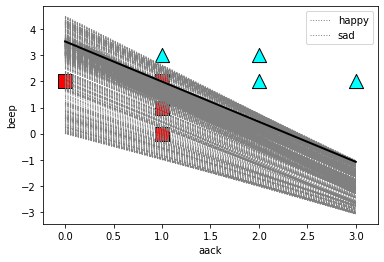

([1.0496680164511867, 0.6822937752183976], -2.410403774583582)

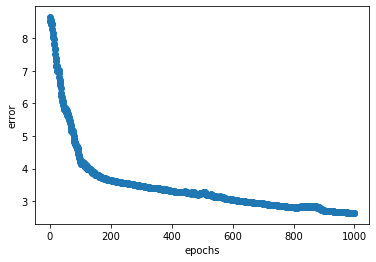

In [24]:
random.seed(100)
logistic_regression_algorithm(X, y)

# Logistic regression using Turi Create

In [11]:
import turicreate as tc

data = tc.SFrame({'X1': X[0], 'X2': X[1], 'y': y})
data

X1,X2,y
1,0,0
0,2,0
1,1,0
1,2,0
1,3,1
2,2,1
3,2,1
2,3,1


In [12]:
classifier = tc.logistic_classifier.create(data,
                                           features = ['X1', 'X2'],
                                           target = 'y',
                                           validation_set=None)

Logistic regression:

--------------------------------------------------------

Number of examples          : 8

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 2

Number of coefficients      : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy |

+-----------+----------+--------------+-------------------+

| 1         | 2        | 1.003947     | 1.000000          |

| 2         | 3        | 1.005373     | 1.000000          |

| 3         | 4        | 1.006215     | 1.000000          |

| 4         | 5        | 1.007143     | 1.000000          |

+-----------+----------+--------------+-------------------+

SUCCESS: Optimal solution found.

In [13]:
print("Model coefficients", classifier.coefficients)

Model coefficients +-------------+-------+-------+--------------------+--------------------+
|     name    | index | class |       value        |       stderr       |
+-------------+-------+-------+--------------------+--------------------+
| (intercept) |  None |   1   | -8.959708265685023 | 6.844844514902394  |
|      X1     |  None |   1   | 2.972553703911967  | 2.6977310191336055 |
|      X2     |  None |   1   | 2.498635186535742  | 2.455296103059154  |
+-------------+-------+-------+--------------------+--------------------+
[3 rows x 5 columns]



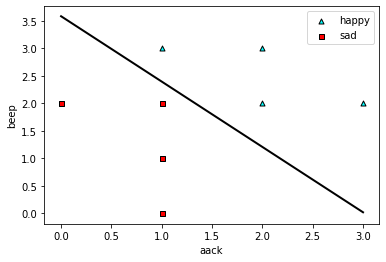

In [14]:
intercept, w1, w2 = classifier.coefficients['value']

plot_points(X, y)
draw_line(w1, w2, intercept)